In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import math

# Exercise 1: Visualizing the Normal Distribution
- **Task**: Write a function that generates a normal distribution with a given mean and standard deviation. Plot the distribution using a histogram and overlay the probability density function (PDF).
- **Input**: Mean, standard deviation, sample size.
- **Output**: A histogram and PDF plot of the normal distribution.
- **Hint**: Use `scipy.stats.norm.pdf` to plot the theoretical normal distribution.


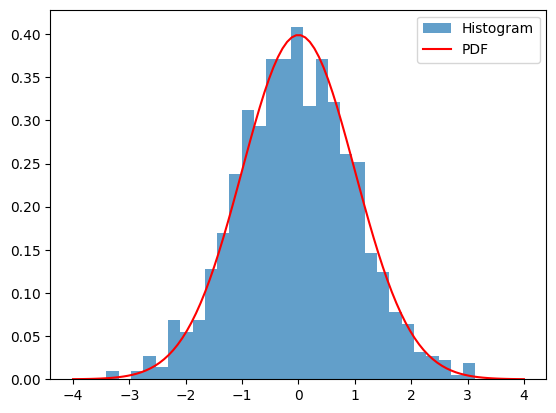

In [5]:
def plot_normal_distribution(mean, std, sample_size):
    # Generate data from a normal distribution
    data = np.random.normal(mean, std, sample_size)
    x_values = np.linspace(mean - 4 * std, mean + 4 * std, 100)
    pdf = stats.norm.pdf(x_values, mean, std)

    plt.hist(data, bins=30, density=True, alpha=0.7, label='Histogram')
    plt.plot(x_values, pdf, label='PDF', color='red')
    plt.legend()
    plt.show()

plot_normal_distribution(0, 1, 1000)


# Exercise 2: Calculating Probabilities for a Normal Distribution
- **Task**: Write a function that calculates the probability of a value falling within a specified range for a normal distribution.
- **Input**: Mean, standard deviation, lower bound, upper bound.
- **Output**: The probability that a random variable falls between the lower and upper bounds.
- **Hint**: Use the cumulative distribution function (CDF) with `scipy.stats.norm.cdf`.


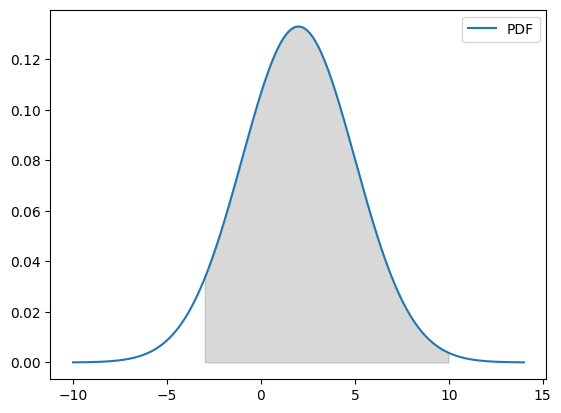

Probability of a value being between -3 and 10: 0.9483792671595955


In [8]:
def calculate_probability(mean, std, lower_bound, upper_bound):
    lower_cdf = stats.norm.cdf(lower_bound, loc=mean, scale=std)
    upper_cdf = stats.norm.cdf(upper_bound, loc=mean, scale=std)
    probability = upper_cdf - lower_cdf

    x_values = np.linspace(mean-4*std, mean+4*std, 1000)
    y_values = stats.norm.pdf(x_values, loc=mean, scale=std)
    plt.plot(x_values, y_values, label='PDF')
    plt.fill_between(x_values, y_values, where=(x_values >= lower_bound) & (x_values <= upper_bound), color='gray', alpha=0.3)
    plt.legend()
    plt.show()

    return probability

MEAN = 2
STD = 3
LOWER_BOUND = -3
UPPERBOUND = 10
print(f"Probability of a value being between {LOWER_BOUND} and {UPPERBOUND}: {calculate_probability(MEAN, STD, LOWER_BOUND, UPPERBOUND)}")


# Exercise 3: Standardizing a Normal Distribution
- **Task**: Write a function to standardize a dataset by converting it to the standard normal distribution (mean of 0, standard deviation of 1).
- **Input**: List of sample values.
- **Output**: The standardized values.
- **Hint**: Use the formula $ z = \frac{x - \bar{x}}{s} $ for each data point, where $ \bar{x} $ is the sample mean and $ s $ is the standard deviation.


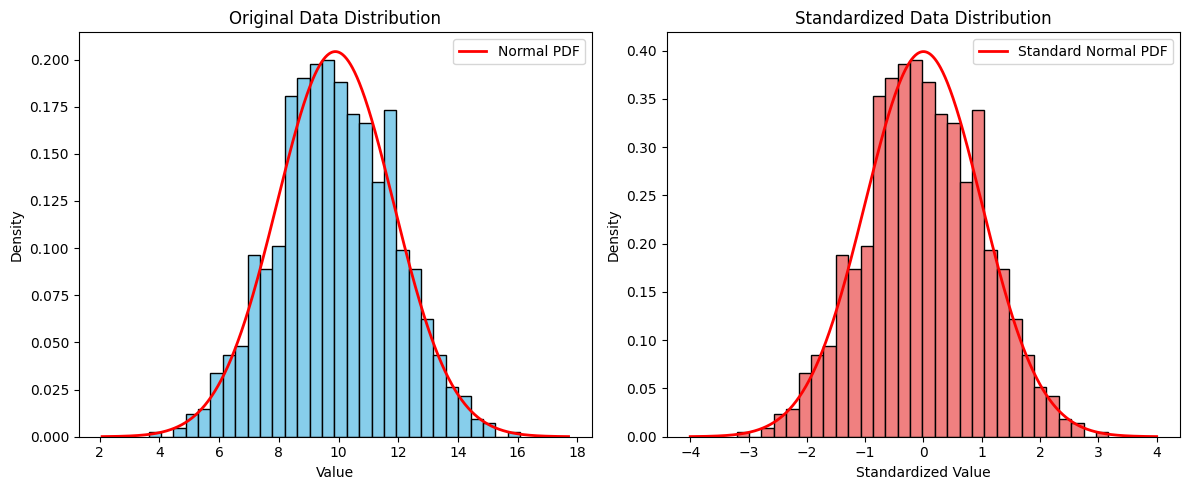

In [15]:
def convert_to_standard_normal(sample_data):
    sample_mean = np.mean(sample_data)
    sample_std = np.std(sample_data)
    standardized_data = (sample_data - sample_mean) / sample_std
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    # Original data plot
    axes[0].hist(sample_data, bins=30, color='skyblue', edgecolor='black', density=True)
    x_values = np.linspace(sample_mean - 4*sample_std, sample_mean + 4*sample_std, 1000)
    axes[0].plot(x_values, stats.norm.pdf(x_values, sample_mean, sample_std), 'r', lw=2, label='Normal PDF')
    axes[0].set_title('Original Data Distribution')
    axes[0].set_xlabel('Value')
    axes[0].set_ylabel('Density')
    axes[0].legend()

    # Standardized data plot
    axes[1].hist(standardized_data, bins=30, color='lightcoral', edgecolor='black', density=True)
    x_standardized = np.linspace(-4, 4, 1000)
    axes[1].plot(x_standardized, stats.norm.pdf(x_standardized, 0, 1), 'r', lw=2, label='Standard Normal PDF')
    axes[1].set_title('Standardized Data Distribution')
    axes[1].set_xlabel('Standardized Value')
    axes[1].set_ylabel('Density')
    axes[1].legend()

    # Display plots
    plt.tight_layout()
    plt.show()
    
    return standardized_data


sample_data = np.random.normal(10, 2, 1000)
standardized_data = convert_to_standard_normal(sample_data)



# Exercise 4: Finding Z-Scores and Percentiles
- **Task**: Write a function that, given a value from a normal distribution, calculates its Z-score and percentile.
- **Input**: Value, mean, standard deviation.
- **Output**: The Z-score and percentile of the value.
- **Hint**: Use `scipy.stats.norm.cdf` to find the percentile.


In [18]:
def calculate_z_score_and_percentile(value, mean, std):
    z_score = (value - mean) / std
    percentile = stats.norm.cdf(z_score) * 100
    return z_score, percentile

z_score, percentile = calculate_z_score_and_percentile(10, 10, 2)
print(f"Z-score: {z_score}, Percentile: {percentile}")

Z-score: 0.0, Percentile: 50.0


# Exercise 5: Simulating the Central Limit Theorem
- **Task**: Simulate the Central Limit Theorem by drawing samples from a non-normal distribution and plotting the means of each sample. Show how the distribution of sample means approaches normality as sample size increases.
- **Input**: Non-normal distribution parameters, number of samples, sample size.
- **Output**: A histogram of sample means for different sample sizes.
- **Hint**: Use a skewed distribution (e.g., exponential) for the original data to highlight the CLT effect.


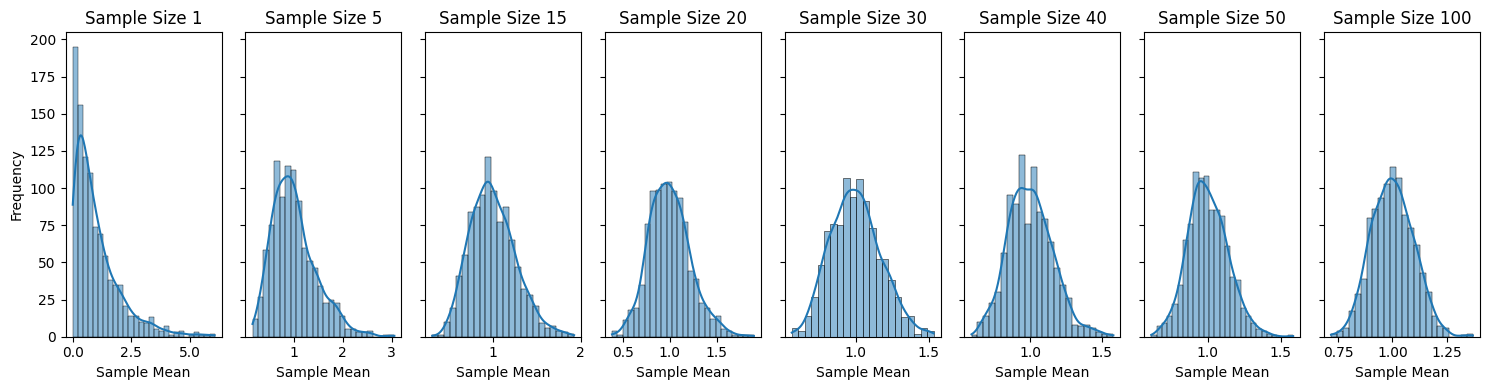

In [25]:
def simulate_clt(dist_lamba, num_samples, sample_size):
    # Init a list to store sample means
    sample_means_lis = []
    for _ in range(num_samples):
        sample = np.random.exponential(scale=1/dist_lamba, size=sample_size)
        sample_mean = np.mean(sample)
        sample_means_lis.append(sample_mean)

    return sample_means_lis

DIST_LAMBDA = 1
NUM_SAMPLES = 1000
SAMPLE_SIZES = [1,5, 15, 20,30,40, 50,100]

fig, axes = plt.subplots(1, len(SAMPLE_SIZES), figsize=(15, 4), sharey=True)
for i, sample_size in enumerate(SAMPLE_SIZES):
    sample_means_lis = simulate_clt(DIST_LAMBDA, NUM_SAMPLES, sample_size)

    # Plot the histogram of the sample means
    sns.histplot(sample_means_lis, kde=True, ax=axes[i])
    axes[i].set_title(f'Sample Size {sample_size}')
    axes[i].set_xlabel('Sample Mean')
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


# Exercise 6: Calculating Probabilities Using Z-Tables
- **Task**: Given a Z-score, calculate the probability associated with the Z-score by using a Z-table lookup.
- **Input**: Z-score.
- **Output**: The probability associated with the Z-score.
- **Hint**: You may use an online Z-table or implement a lookup using `scipy.stats.norm.cdf`.


In [27]:
def z_score_probability(z_score):
    return stats.norm.cdf(z_score)

# Example usage
z_score = -1.5
probability = z_score_probability(z_score)
print(f"Probability associated with Z-score {z_score}: {probability}")

Probability associated with Z-score -1.5: 0.06680720126885806


# Exercise 7: Simulating the Law of Large Numbers with Normal Distribution
- **Task**: Draw random samples from a normal distribution and calculate the sample mean. Observe how the sample mean converges to the population mean as the sample size increases.
- **Input**: Mean, standard deviation, range of sample sizes.
- **Output**: A plot showing sample size on the x-axis and sample mean on the y-axis.
- **Hint**: The sample mean should stabilize around the population mean with larger sample sizes.


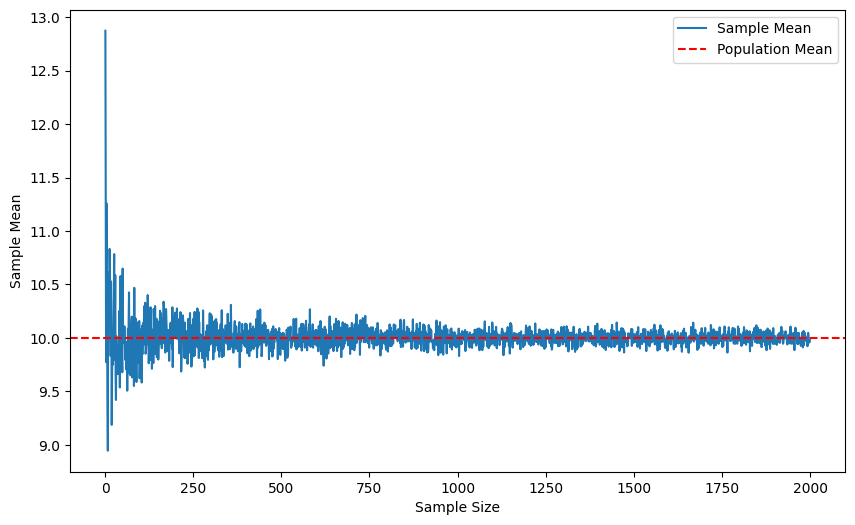

In [33]:
def sample_mean_convergence(pop_mean, pop_std, max_sample_size):
    sample_sizes = np.arange(1, max_sample_size, 1)
    sample_means_lis = []
    for sample_size in sample_sizes:
        sample = np.random.normal(pop_mean, pop_std, sample_size)
        sample_mean = np.mean(sample)
        sample_means_lis.append(sample_mean)
    
    plt.figure(figsize=(10, 6))
    plt.plot(sample_sizes, sample_means_lis, label='Sample Mean')
    plt.axhline(pop_mean, color='r', linestyle='--', label='Population Mean')
    plt.xlabel('Sample Size')
    plt.ylabel('Sample Mean')
    plt.legend()
    plt.show()

SAMPLE_MEAN_CONVERGENCE_POP_MEAN = 10
SAMPLE_MEAN_CONVERGENCE_POP_STD = 2
SAMPLE_MEAN_CONVERGENCE_MAX_SAMPLE_SIZE = 2000

sample_mean_convergence(SAMPLE_MEAN_CONVERGENCE_POP_MEAN, SAMPLE_MEAN_CONVERGENCE_POP_STD, SAMPLE_MEAN_CONVERGENCE_MAX_SAMPLE_SIZE)



# Exercise 8: Generating Confidence Intervals for a Normal Distribution
- **Task**: Generate samples from a normal distribution and calculate a 95% confidence interval for the mean.
- **Input**: Mean, standard deviation, sample size.
- **Output**: The calculated confidence interval.
- **Hint**: Use the formula $ \bar{x} \pm z \cdot \frac{\sigma}{\sqrt{n}} $ where $ z $ is the critical value for a 95% confidence level.


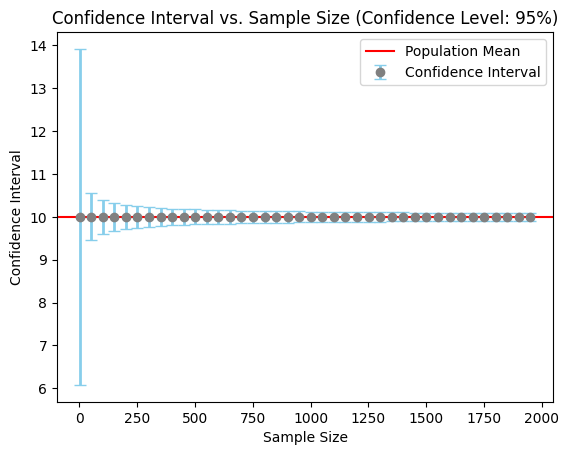

In [39]:
def calculate_confidence_interval(sample_mean, critical_value, std, sample_size):
    margin_of_error = critical_value * (std/math.sqrt(sample_size))
    left = sample_mean - margin_of_error
    right= sample_mean + margin_of_error
    return left, right

def plot_confidence_interval(pop_mean, pop_std, max_sample_size, confidence_level=0.95):
    # Calculate the critical value for the specified confidence level
    critical_value = stats.norm.ppf(1 - (1 - confidence_level) / 2)  # Two-tailed critical value
    
    sample_sizes = np.arange(1, max_sample_size + 1, 50)  # Interval of 50 for clearer plotting
    
    # Plot the population mean as a reference line
    plt.axhline(y=pop_mean, color='red', linestyle='-', label='Population Mean')
    
    # Plot confidence intervals for each sample size
    left_bounds = []
    right_bounds = []
    for sample_size in sample_sizes:
        left, right = calculate_confidence_interval(pop_mean, critical_value, pop_std, sample_size)
        left_bounds.append(left)
        right_bounds.append(right)
        
    # Plot the left and right bounds as an interval plot
    plt.errorbar(sample_sizes, [pop_mean] * len(sample_sizes), 
                 yerr=[np.array(right_bounds) - pop_mean, np.array(pop_mean) - np.array(left_bounds)],
                 fmt='o', color='gray', ecolor='skyblue', elinewidth=2, capsize=4, label='Confidence Interval')

    # Add labels and title
    plt.xlabel('Sample Size')
    plt.ylabel('Confidence Interval')
    plt.title(f'Confidence Interval vs. Sample Size (Confidence Level: {confidence_level*100:.0f}%)')
    plt.legend()
    plt.show()

CONFIDENCE_LEVEL = 0.95 # 95% confidence interval
MAX_SAMPLE_SIZE = 2000
POP_MEAN = 10
POP_STD = 2

plot_confidence_interval(POP_MEAN, POP_STD, MAX_SAMPLE_SIZE, CONFIDENCE_LEVEL)


For the same confidence level, the confidence interval is narrower when the sample size is larger.

With larger sample sizes (around 500 and beyond), the confidence intervals become very narrow, and they stabilize around the population mean (red line).

This demonstrates that with large samples, the sample mean is a reliable estimator of the population mean, and the margin of error decreases significantly, providing a tighter confidence interval.



# Exercise 9: Visualizing the Effect of Mean and Standard Deviation on the Shape of the Normal Curve
- **Task**: Plot multiple normal distributions on the same graph with varying means and standard deviations to observe how these parameters affect the shape of the curve.
- **Input**: List of means and standard deviations.
- **Output**: A plot showing the different normal distributions.
- **Hint**: Different means will shift the curve left or right, and different standard deviations will affect the spread.


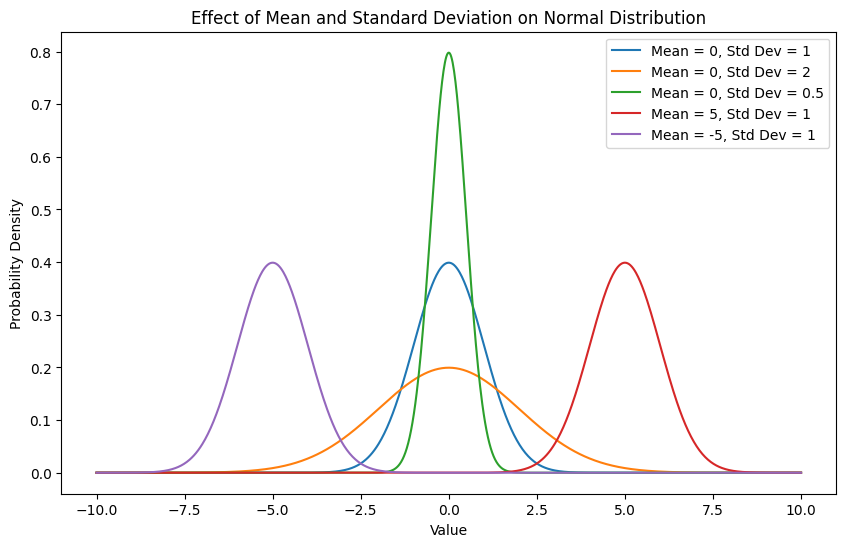

In [44]:
def plot_normal_distributions(means, std_devs):
    # Generate x values covering a wide range for visualization
    x_values = np.linspace(-10, 10, 1000)
    
    # Plot each normal distribution
    plt.figure(figsize=(10, 6))
    for mean, std_dev in zip(means, std_devs):
        # Calculate the y values of the normal distribution
        y_values = stats.norm.pdf(x_values, mean, std_dev)
        
        # Plot the normal distribution curve
        label = f"Mean = {mean}, Std Dev = {std_dev}"
        plt.plot(x_values, y_values, label=label)
    
    # Add labels and title
    plt.xlabel("Value")
    plt.ylabel("Probability Density")
    plt.title("Effect of Mean and Standard Deviation on Normal Distribution")
    plt.legend()
    plt.show()

# Example usage
means = [0, 0, 0, 5, -5]
std_devs = [1, 2, 0.5, 1, 1]
plot_normal_distributions(means, std_devs)

# Exercise 10: Empirical Rule (68-95-99.7 Rule)
- **Task**: Generate a normal distribution and calculate the proportion of values that fall within 1, 2, and 3 standard deviations from the mean. Compare these proportions to the theoretical 68-95-99.7% rule.
- **Input**: Mean, standard deviation, sample size.
- **Output**: Proportions within 1, 2, and 3 standard deviations, compared to theoretical values.
- **Hint**: Use `scipy.stats.norm.cdf` to calculate probabilities and compare to empirical values.


In [46]:
def calculate_proportions(mean, std, sample_size):
    data = np.random.normal(mean, std, sample_size)

    # calculate the proportion of values within 1, 2, and 3 standard deviations from the mean
    within_1_std = np.mean((data >= mean - std) & (data <= mean + std))
    within_2_std = np.mean((data >= mean - 2*std) & (data <= mean + 2*std))
    within_3_std = np.mean((data >= mean - 3*std) & (data <= mean + 3*std))
    
    print(f"Proportion of values within 1 standard deviation: {within_1_std}")
    print(f"Proportion of values within 2 standard deviations: {within_2_std}")
    print(f"Proportion of values within 3 standard deviations: {within_3_std}")

MEAN = 2
STD = 3
SAMPLE_SIZE = 10000
calculate_proportions(MEAN, STD, SAMPLE_SIZE)



Proportion of values within 1 standard deviation: 0.6879
Proportion of values within 2 standard deviations: 0.9524
Proportion of values within 3 standard deviations: 0.9983


# Exercise 11: Testing for Normality Using the Shapiro-Wilk Test
- **Task**: Write a function to perform the Shapiro-Wilk test for normality on a given dataset and determine if the data is likely to come from a normal distribution.
- **Input**: List of sample values.
- **Output**: The test statistic, p-value, and a conclusion on normality.
- **Hint**: Use `scipy.stats.shapiro` to perform the Shapiro-Wilk test.


The Sharpiro-Wilk test checks if the data is likely to come from a normal distribution.

- Null Hypothesis ($ H_0 $): The data comes from a normal distribution.

- Alternative Hypothesis ($ H_1 $): The data does not come from a normal distribution.

- If the p-value is less than the significance level (e.g., 0.05), we reject the null hypothesis and conclude that the data is not likely to come from a normal distribution.

In [47]:
def test_normality(data, significance_level=0.05):
    test_statistic, p_value = stats.shapiro(data)
    if p_value < significance_level:
        conclusion = "The data is not likely to come from a normal distribution."
    else:
        conclusion = "The data is likely to come from a normal distribution."

    return test_statistic, p_value, conclusion

# 1. Data from a normal distribution
normal_data = np.random.normal(loc=0, scale=1, size=1000)
statistic, p_value, conclusion = test_normality(normal_data)
print("Normal Distribution Test")
print(f"Statistic: {statistic}, P-value: {p_value}, Conclusion: {conclusion}\n")

# 2. Data from a uniform distribution
uniform_data = np.random.uniform(low=-1, high=1, size=1000)
statistic, p_value, conclusion = test_normality(uniform_data)
print("Uniform Distribution Test")
print(f"Statistic: {statistic}, P-value: {p_value}, Conclusion: {conclusion}\n")

# 3. Data from an exponential distribution
exponential_data = np.random.exponential(scale=1, size=1000)
statistic, p_value, conclusion = test_normality(exponential_data)
print("Exponential Distribution Test")
print(f"Statistic: {statistic}, P-value: {p_value}, Conclusion: {conclusion}\n")

Normal Distribution Test
Statistic: 0.9986747173036196, P-value: 0.6715006910121014, Conclusion: The data is likely to come from a normal distribution.

Uniform Distribution Test
Statistic: 0.9554837000831637, P-value: 7.366978614479779e-17, Conclusion: The data is not likely to come from a normal distribution.

Exponential Distribution Test
Statistic: 0.7888022044417761, P-value: 4.437238992234359e-34, Conclusion: The data is not likely to come from a normal distribution.



# Exercise 12: Calculating Tail Probabilities for Extreme Values
- **Task**: Write a function to calculate the probability of observing extreme values (greater than or less than a specific threshold) in a normal distribution.
- **Input**: Mean, standard deviation, threshold value.
- **Output**: Probability of observing values beyond the threshold.
- **Hint**: Calculate the upper and lower tail probabilities using the CDF.


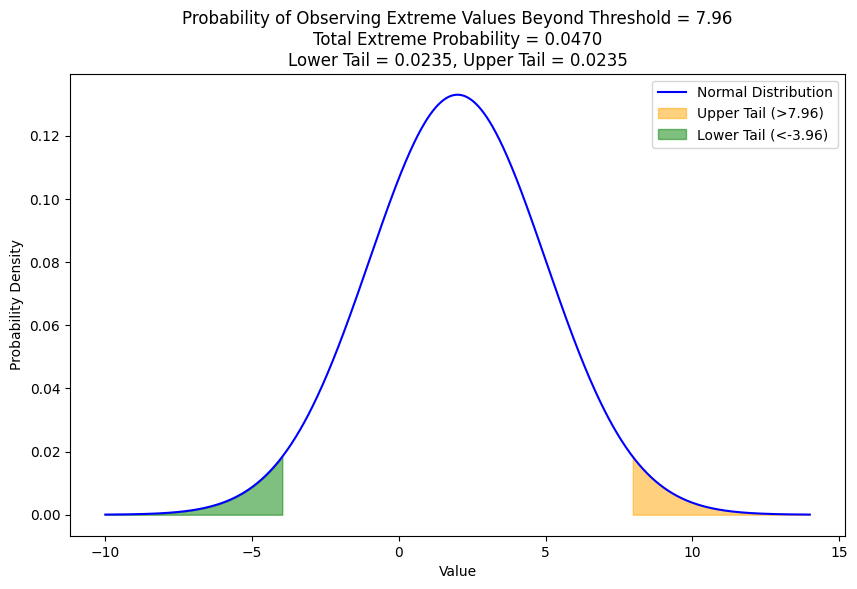

In [52]:
def extreme_value_probability(mean, std_dev, threshold):
    # Calculate the Z-score of the threshold
    z_score = (threshold - mean) / std_dev
    
    # Calculate the probabilities for the lower and upper tails
    lower_tail_prob = stats.norm.cdf(-abs(z_score))  # Probability of observing values less than -|z_score|
    upper_tail_prob = 1 - stats.norm.cdf(abs(z_score))  # Probability of observing values greater than |z_score|
    
    # Total probability of observing values beyond the threshold (two tails)
    extreme_prob = lower_tail_prob + upper_tail_prob
    
    return extreme_prob, lower_tail_prob, upper_tail_prob
def plot_extreme_values(mean, std_dev, threshold):
    # Generate a range of x values for plotting the normal distribution
    x_values = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
    y_values = stats.norm.pdf(x_values, mean, std_dev)
    
    # Calculate probabilities
    extreme_prob, lower_tail_prob, upper_tail_prob = extreme_value_probability(mean, std_dev, threshold)
    
    # Plot the normal distribution
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, label='Normal Distribution', color='blue')
    
    # Shade the areas beyond the threshold
    plt.fill_between(x_values, y_values, where=(x_values >= threshold), color='orange', alpha=0.5, label=f'Upper Tail (>{threshold})')
    plt.fill_between(x_values, y_values, where=(x_values <= -threshold + 2*mean), color='green', alpha=0.5, label=f'Lower Tail (<{-threshold + 2*mean})')
    
    # Add labels and title
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.title(f'Probability of Observing Extreme Values Beyond Threshold = {threshold}\n'
              f'Total Extreme Probability = {extreme_prob:.4f}\n'
              f'Lower Tail = {lower_tail_prob:.4f}, Upper Tail = {upper_tail_prob:.4f}')
    plt.legend()
    plt.show()

MEAN = 2
STD = 3
THRESHOLD = 7.96
plot_extreme_values(MEAN, STD, THRESHOLD)

# Exercise 13: Visualizing Normal Approximation of the Binomial Distribution
- **Task**: Simulate a binomial distribution with large n and approximate it using a normal distribution. Plot both distributions and observe how well the normal approximation fits the binomial.
- **Input**: Number of trials (n), probability of success (p).
- **Output**: A plot showing both the binomial and normal distributions.
- **Hint**: For large n, the binomial distribution can be approximated by $ N(np, \sqrt{np(1-p)}) $.


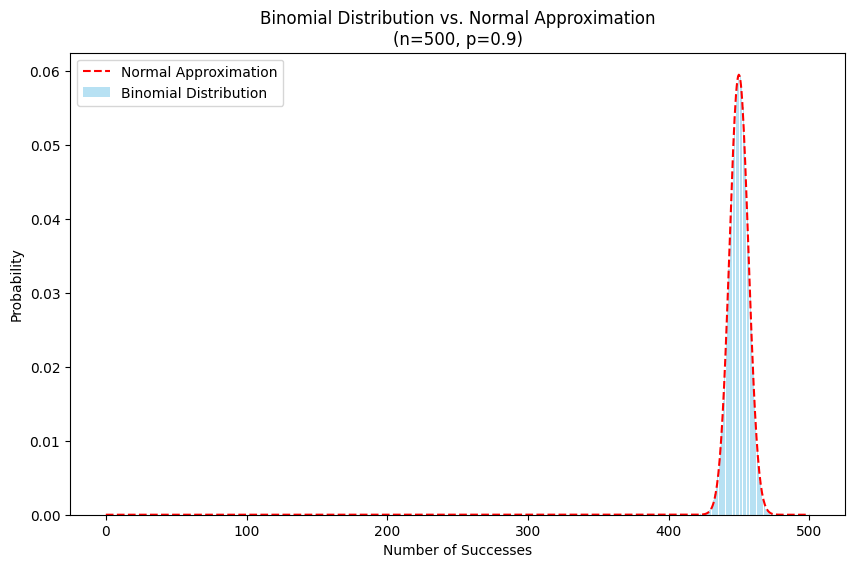

In [4]:
def plot_binomial_distribution(n, p):
    binomial_mean = n * p 
    binomial_std = math.sqrt(n * p * (1 - p))

    x_values = np.arange(0, n + 1)
    binomial_probs = stats.binom.pmf(x_values, n, p)

    # generate x values for the normal distribution
    normal_x_values = np.linspace(0,n,1000)
    normal_y_values = stats.norm.pdf(normal_x_values, binomial_mean, binomial_std)

    # Plot the binomial distribution
    plt.figure(figsize=(10, 6))
    plt.bar(x_values, binomial_probs, color='skyblue', label='Binomial Distribution', alpha=0.6, width=0.8)
    
    # Plot the normal approximation
    plt.plot(normal_x_values, normal_y_values, color='red', linestyle='--', label='Normal Approximation')
    
    # Add labels and title
    plt.xlabel('Number of Successes')
    plt.ylabel('Probability')
    plt.title(f'Binomial Distribution vs. Normal Approximation\n(n={n}, p={p})')
    plt.legend()
    plt.show()

N = 500
P = 0.9
plot_binomial_distribution(N, P)


# Exercise 14: Transforming Any Dataset to a Normal Distribution (Box-Cox Transformation)
- **Task**: Apply the Box-Cox transformation to a non-normal dataset to make it more normally distributed. Plot the original and transformed data.
- **Input**: List of sample values.
- **Output**: Histograms of the original and transformed data.
- **Hint**: Use `scipy.stats.boxcox` to perform the transformation and observe the effect on normality.

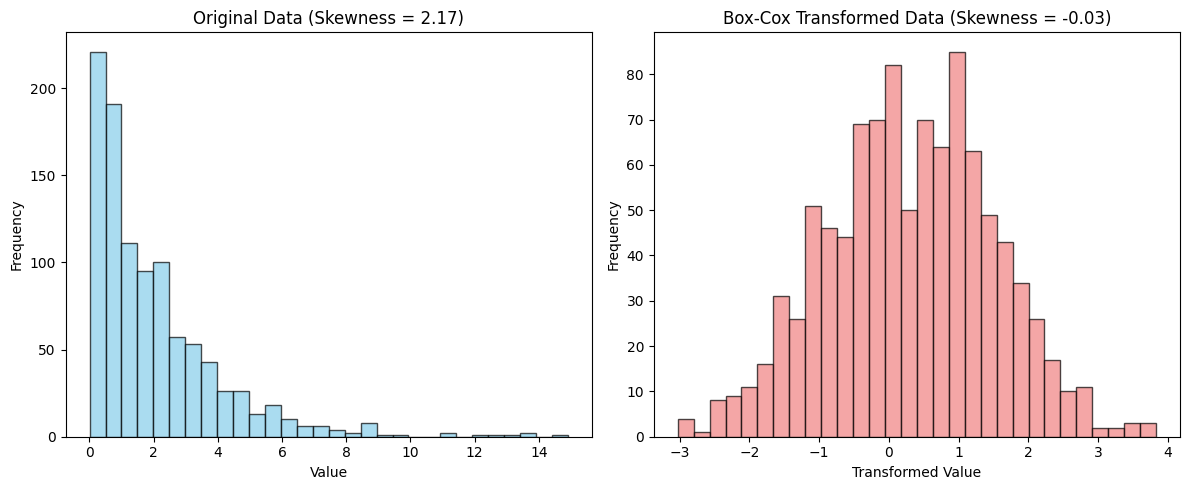

In [5]:
def plot_boxcox_transformation(data):
    # Apply the Box-Cox transformation
    transformed_data, _ = stats.boxcox(data)
    
    # Plot the original and transformed data
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Original data histogram
    axes[0].hist(data, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0].set_title(f'Original Data (Skewness = {stats.skew(data):.2f})')
    axes[0].set_xlabel('Value')
    axes[0].set_ylabel('Frequency')
    
    # Transformed data histogram
    axes[1].hist(transformed_data, bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
    axes[1].set_title(f'Box-Cox Transformed Data (Skewness = {stats.skew(transformed_data):.2f})')
    axes[1].set_xlabel('Transformed Value')
    axes[1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Example usage
# Generating a non-normal, skewed dataset (exponential distribution)
data = np.random.exponential(scale=2, size=1000)
plot_boxcox_transformation(data)